# Bandpass filtering in Theta Band

Test of fix for Issue 222 (https://github.com/NeuralEnsemble/elephant/issues/220) using new option of 'sosfiltfilt' bandpass filtering using Elephant for theta band (4-8 Hz in rodents). 

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

import neo
from quantities import Hz, mV, sec, ms
from elephant import signal_processing

%matplotlib inline

## Test Signal

Created test signal concatenating 1 second each of 2 Hz, 6 Hz and 12 Hz noisy sine waves.

In [2]:
def test_sig():
    fs = 5000.0
    t = np.arange(0.0,3.0,1.0/fs)
    s = 0.1*np.random.normal(size=len(t))
    s[0:5000] += np.sin(2.0*np.pi*2.0*t[0:5000])
    s[5000:10000] += np.sin(2.0*np.pi*6.0*t[0:5000])
    s[10000:15000] += np.sin(2.0*np.pi*12.0*t[0:5000])
    return t, s, fs

Create numpy verison:

In [3]:
tt, ss, fss = test_sig()
ss.shape, fss

((15000,), 5000.0)

Create AnalogSignal version:

In [4]:
rec = neo.AnalogSignal(ss, sampling_rate=fss*Hz, units='mV')
rec

AnalogSignal with 1 channels of length 15000; units mV; datatype float64 
sampling rate: 5000.0
time: 0.0 to 3.0

Show plot of AnalogSignal trace:

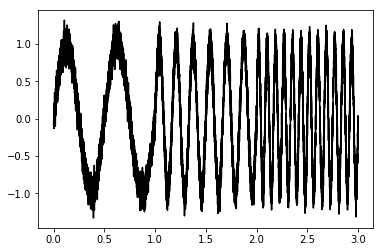

In [5]:
plt.plot(rec.times, rec.magnitude, 'k-');

## Elephant bandpass

To compare new 'sosfiltfilt' option against default 'filtfilt' option, now apply Elephant functions for 5-th order Butterworth filtering to AnalogSignal example. 

(a) Low-Pass Test

In [6]:
zx1 = signal_processing.butter(rec, lowpass_freq=4.0*Hz, order=5, filter_function='sosfiltfilt')
zx4 = signal_processing.butter(rec, lowpass_freq=4.0*Hz, order=5, filter_function='filtfilt')

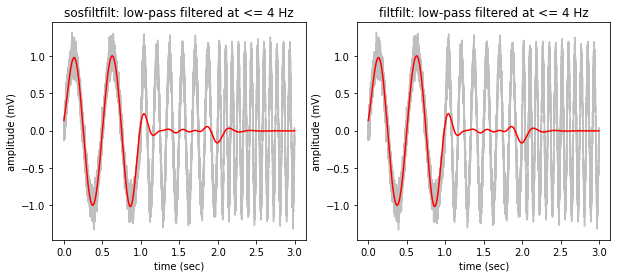

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx1.times, zx1.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('sosfiltfilt: low-pass filtered at <= 4 Hz');
plt.subplot(1,2,2)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx4.times, zx4.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('filtfilt: low-pass filtered at <= 4 Hz');

(b) High-Pass Test

In [8]:
zx2 = signal_processing.butter(rec, highpass_freq=8.0*Hz, order=5, filter_function='sosfiltfilt')
zx5 = signal_processing.butter(rec, highpass_freq=8.0*Hz, order=5, filter_function='filtfilt')

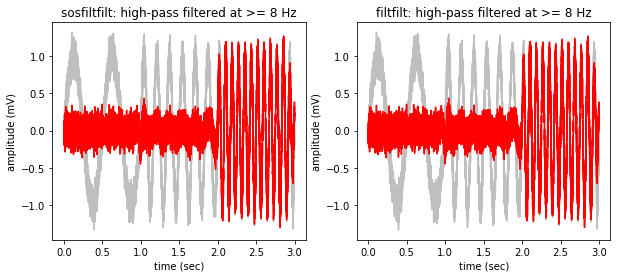

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx2.times, zx2.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('sosfiltfilt: high-pass filtered at >= 8 Hz')
plt.subplot(1,2,2)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx5.times, zx5.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('filtfilt: high-pass filtered at >= 8 Hz');

(c) Band-Pass Test

In [10]:
zx3 = signal_processing.butter(rec, 4.0*Hz, 8.0*Hz, order=5, filter_function='sosfiltfilt')
zx6 = signal_processing.butter(rec, 4.0*Hz, 8.0*Hz, order=5, filter_function='filtfilt')

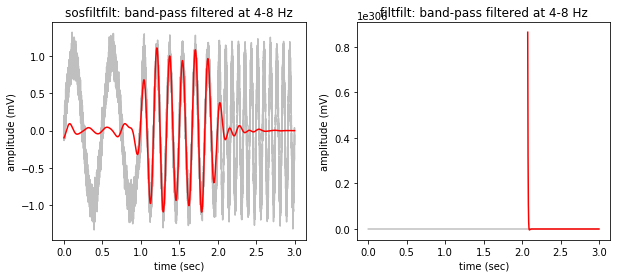

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx3.times, zx3.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('sosfiltfilt: band-pass filtered at 4-8 Hz')
plt.subplot(1,2,2)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx6.times, zx6.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('filtfilt: band-pass filtered at 4-8 Hz');

Now repeat using 4-th order Butterworth filter:

In [12]:
zx3b = signal_processing.butter(rec, 4.0*Hz, 8.0*Hz, order=4, filter_function='sosfiltfilt')
zx6b = signal_processing.butter(rec, 4.0*Hz, 8.0*Hz, order=4, filter_function='filtfilt')

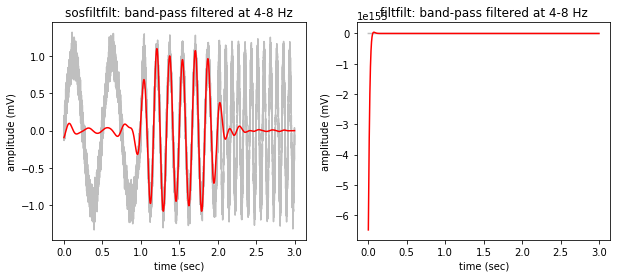

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx3b.times, zx3b.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('sosfiltfilt: band-pass filtered at 4-8 Hz')
plt.subplot(1,2,2)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx6b.times, zx6b.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('filtfilt: band-pass filtered at 4-8 Hz');

Now repeat using 3-rd order Butterworth filter:

In [14]:
zx3c = signal_processing.butter(rec, 4.0*Hz, 8.0*Hz, order=3, filter_function='sosfiltfilt')
zx6c = signal_processing.butter(rec, 4.0*Hz, 8.0*Hz, order=3, filter_function='filtfilt')

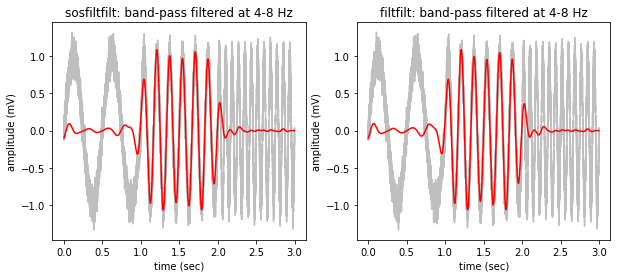

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx3c.times, zx3c.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('sosfiltfilt: band-pass filtered at 4-8 Hz')
plt.subplot(1,2,2)
plt.plot(rec.times, rec.magnitude,'k-',alpha=0.25)
plt.plot(zx6c.times, zx6c.magnitude,'r-'), plt.ylabel('amplitude (mV)'), plt.xlabel('time (sec)')
plt.title('filtfilt: band-pass filtered at 4-8 Hz');

## Summary

In this simple test case with a sampling frequency of 5000 Hz, the 'sosfiltfilt' option was required to produce reasonable results for theta band-pass filtering using 4-th and 5-th order Butterworth filters. For 3-rd order 'filtfilt' gave similar results to 'sosfiltfilt' option. 